<a href="https://colab.research.google.com/github/soloblade2388-ai/blank-app/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-contrib-python

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

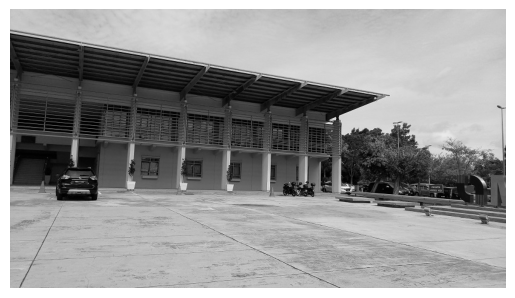

(<matplotlib.image.AxesImage at 0x78e6a13d6150>,
 (np.float64(-0.5), np.float64(819.5), np.float64(460.5), np.float64(-0.5)),
 None)

In [ ]:
img_query = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/query.jpg')
img_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)
plt.imshow(img_query, cmap='gray'), plt.axis('off'), plt.show()

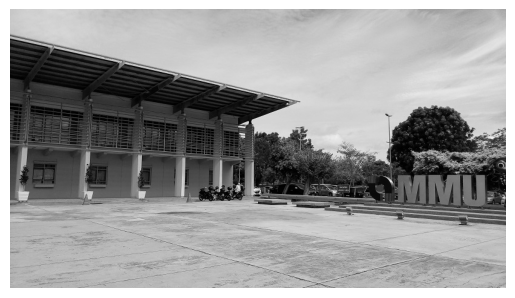

(<matplotlib.image.AxesImage at 0x78e6a02d9f70>,
 (np.float64(-0.5), np.float64(819.5), np.float64(460.5), np.float64(-0.5)),
 None)

In [ ]:
img_db = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/database.jpg') # trainImage
img_db = cv2.cvtColor(img_db, cv2.COLOR_BGR2GRAY)
plt.imshow(img_db, cmap='gray'), plt.axis('off'), plt.show()

(<matplotlib.image.AxesImage at 0x78e6bc446390>,
 (np.float64(-0.5), np.float64(1639.5), np.float64(460.5), np.float64(-0.5)))

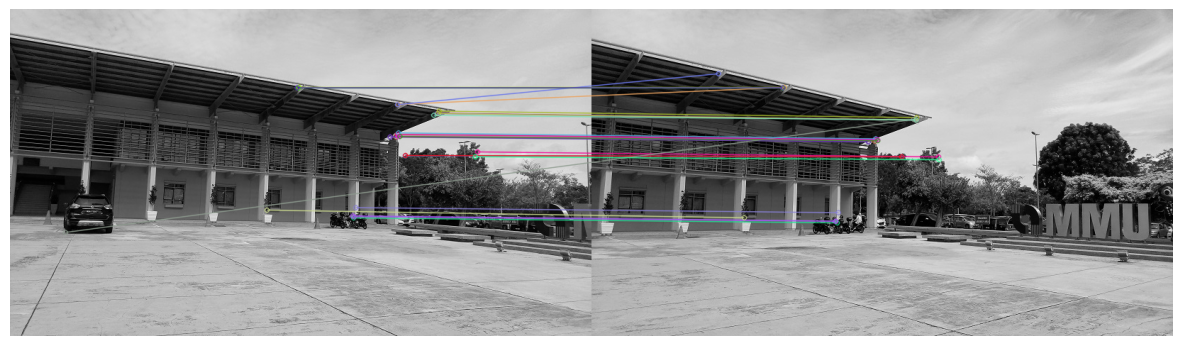

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img_query, None)
kp2, des2 = orb.detectAndCompute(img_db, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
  if m.distance < 0.75*n.distance:
    good. append([m])

# cv2.drawMatchesKnn gives a list of lists as matches
img_ORB = cv2.drawMatchesKnn(img_query,kp1,img_db,kp2,good,None, flags=2)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(img_ORB), plt.axis('off')

AKAZE keypoint detector (a faster version of KAZE). Compare the results obtained using AKAZE with ORB

In [ ]:
# Initiate ORB detector
orb = cv2.AKAZE_create()

# find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img_query, None)
kp2, des2 = orb.detectAndCompute(img_db, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
  if m.distance < 0.75*n.distance:
    good. append([m])

(<matplotlib.image.AxesImage at 0x78e6bca96de0>,
 (np.float64(-0.5), np.float64(1639.5), np.float64(460.5), np.float64(-0.5)))

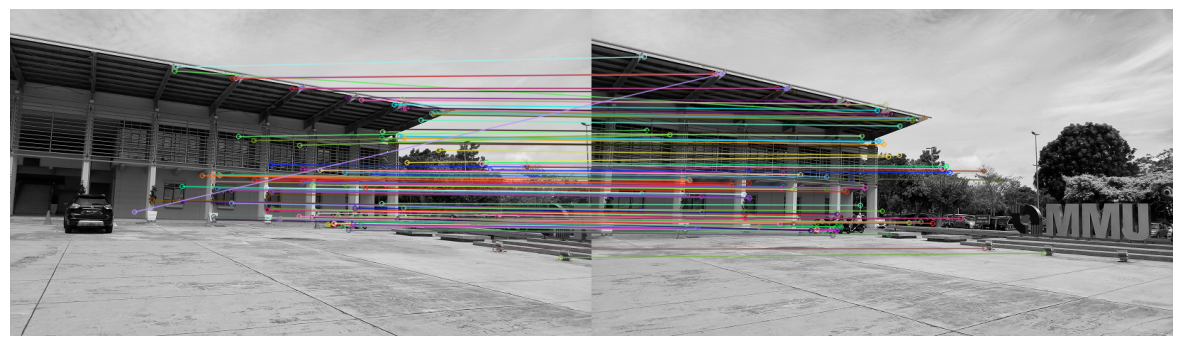

In [ ]:
img_akaze = cv2.drawMatchesKnn(img_query,kp1,img_db,kp2,good, None, flags=2)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(img_akaze), plt.axis('off')

Problem 2: Application of local features for Image Stiching

In [ ]:
import numpy as np
import cv2
from skimage.transform import warp
from matplotlib import pyplot as plt
%matplotlib inline

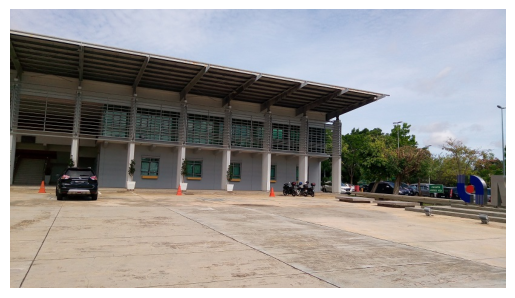

(<matplotlib.image.AxesImage at 0x78e68dc8f800>,
 (np.float64(-0.5), np.float64(819.5), np.float64(460.5), np.float64(-0.5)),
 None)

In [ ]:
f1= cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/mmu_2.jpg')
f1=cv2.cvtColor(f1, cv2.COLOR_BGR2RGB)
plt.imshow(f1, cmap='gray'), plt.axis('off'), plt.show()

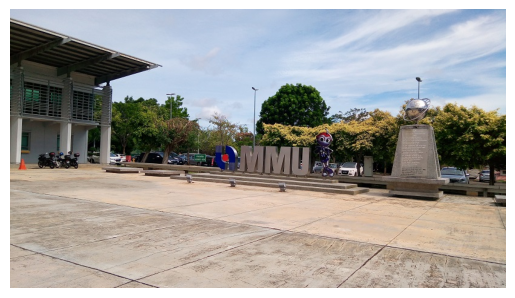

(<matplotlib.image.AxesImage at 0x78e68d1cc7a0>,
 (np.float64(-0.5), np.float64(819.5), np.float64(460.5), np.float64(-0.5)),
 None)

In [ ]:
f2= cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/mmu_1.jpg')
f2= cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)
plt.imshow(f2, cmap='gray'), plt.axis('off') , plt.show()

Apply the AKAZE local keypoints detector to find the keypoints in both images.

In [ ]:
akaze = cv2.AKAZE_create()
# find the keypoints and descriptors with SIFT
(kp1, des1) = akaze.detectAndCompute(f1, None)
(kp2, des2) = akaze.detectAndCompute(f2, None)

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

5. Run RANSAC to estimate homography.
6. Warp one of the image to align for stitching.
7. Stich the image together

(<matplotlib.image.AxesImage at 0x78e6bca45d90>,
 (np.float64(-0.5), np.float64(1639.5), np.float64(460.5), np.float64(-0.5)))

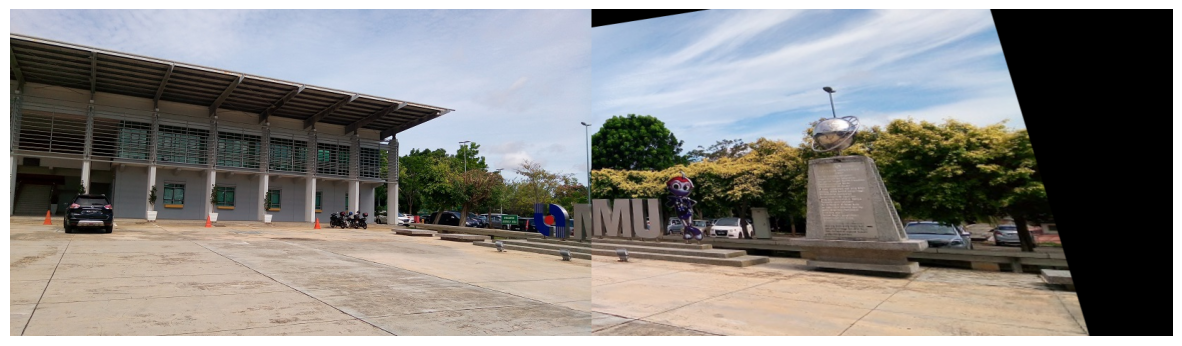

In [ ]:
# Apply ratio test
good = []
for m in matches:
  if m[0].distance < 0.5*m[1].distance:
    good.append(m)
    matches = np.asarray(good)

if len(matches[:,0]) >= 4:
  src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
  dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
  H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
#print(H)|
else:
  raise AssertionError("Can't find enough keypoints.")

M1, N1 = f1.shape[:2]
M2, N2 = f2.shape[:2]

f_stitched = warp(f2, H, output_shape=(M1, N1+N2))

f1 = (f1* 255).astype(np.uint8)

f_stitched[0:M1, 0:N1,:]=f1
f_stitched = (f_stitched * 255).astype(np.uint8)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(f_stitched), plt.axis('off')

Problem 3: Application of local features for image registration

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

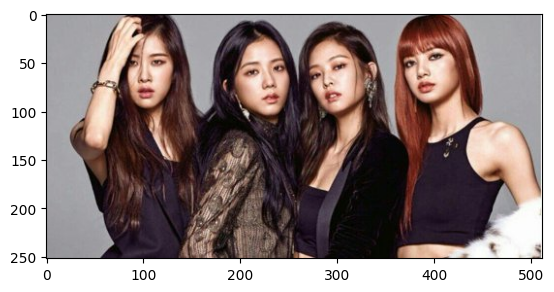

In [ ]:
im_src = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/src.jpg')
im_src = cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB)
plt.imshow(im_src)


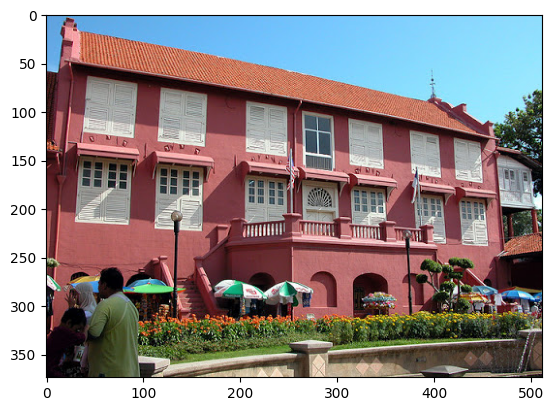

In [ ]:
im_dst = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lab9/Images/dest.jpg')
im_dst = cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB)
plt.imshow(im_dst)

In [ ]:
[h, w, d] = im_src.shape
pts_src = np.array([[0,0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=float)
pts_dst = np.array([[117, 77], [251, 93], [245, 153], [117, 146]], dtype=float)

In [ ]:
# Find homography
M, mask = cv2.findHomography(pts_src, pts_dst)

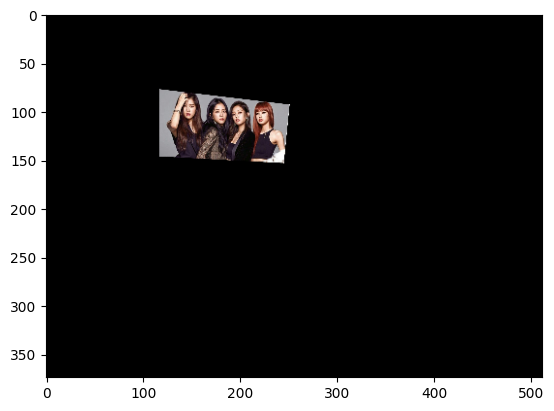

In [ ]:
# Use homography
[w, h, d] = im_dst.shape
temp = cv2.warpPerspective(im_src, M, (h, w))
plt.imshow(temp)

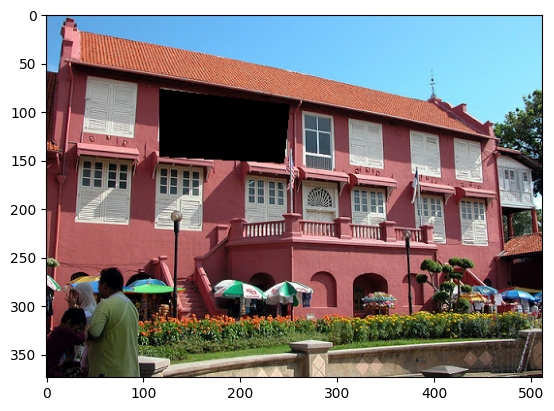

In [ ]:
# Black out destination
cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0)
plt.imshow(im_dst)

(<matplotlib.image.AxesImage at 0x78e68c597560>,
 (np.float64(-0.5), np.float64(511.5), np.float64(373.5), np.float64(-0.5)))

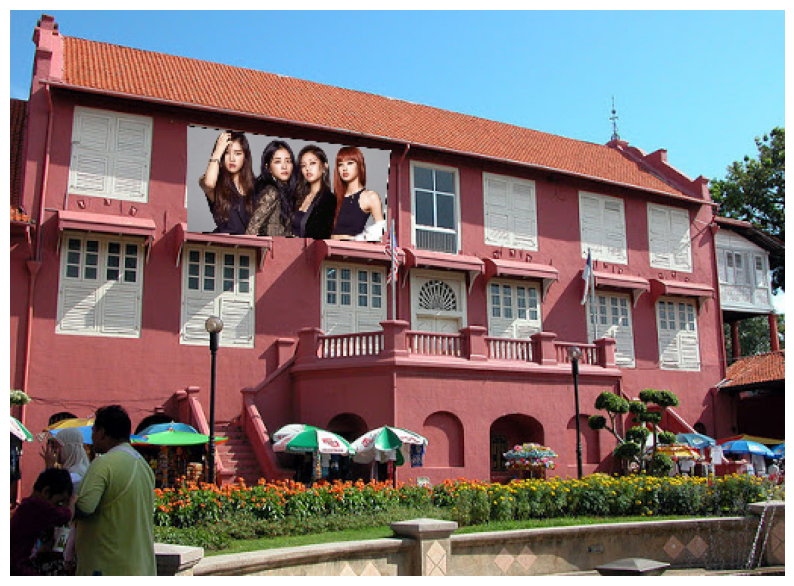

In [ ]:
# Add black out destination with homography
result = im_dst + temp
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.imshow(result), plt.axis('off')


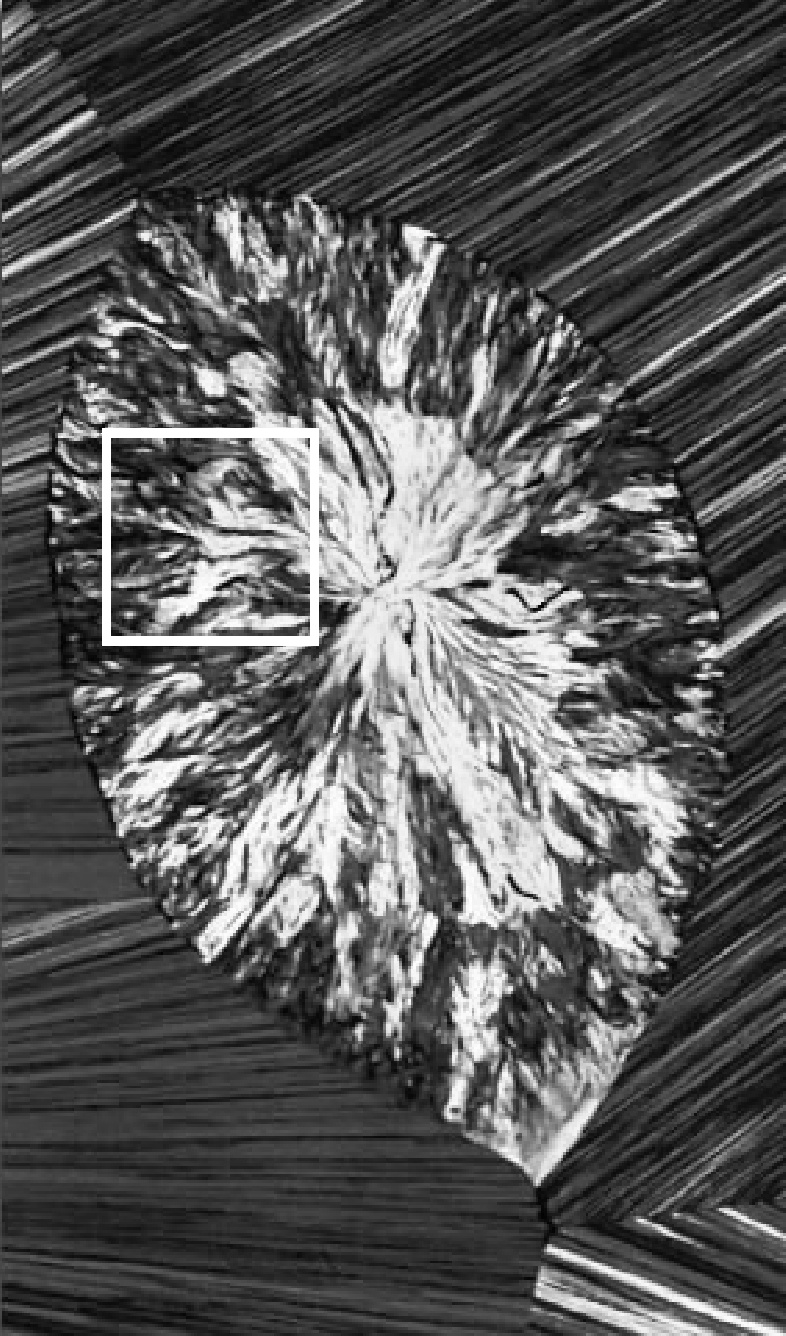

In [ ]:
from IPython.display import HTML, display
import cv2
import numpy as np
import base64
import matplotlib.pyplot as plt
from google.colab import output

# Load and prepare the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Lab9/Images/coarse.jpg'
image = cv2.imread(image_path)

if image is None:
  raise FileNotFoundError("Image not found at the specified path.")

# Convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Encode the image as Base64 for embedding in HTML
_, buffer = cv2. imencode('.jpg', image)
encoded_image = base64.b64encode(buffer).decode('utf-8')

# Store selected points
selected_points = []

# Define a function to handle points sent from JavaScript
def capture_points(points):
  global selected_points
  selected_points = points
  print(f"Captured points: {selected_points}")

# Register the python function to handle coordinates
output.register_callback('capturePoints', capture_points)

# JavaScript for image display and capturing mouse clicks
html_code = f"""
<div>
  <p>Click two points on the image to select the ROI (Top-Left and Bottom-Right).</p>
  <img id="image" src="data:image/jpeg;base64,{encoded_image}" style="border: 1px solid black; max-width: 100%;">
</div>
<script>
let points = [];
document.getElementById('image').addEventListener('click', function(e) {{
    // Get image position and size
    const rect = e.target.getBoundingClientRect();
    const x = Math.round(e.clientX - rect.left);
    const y = Math.round(e.clientY - rect.top);

    // Add the click coordinates
    points.push([x, y]);

    // If two points are captured, send them to Python
    if (points.length == 2) {{
        google.colab.kernel.invokeFunction('capture_points', [points], {{}});
        points = [];  // Clear points for the next selection
        alert('Points sent to Python: ' + JSON.stringify(points));
    }}
}});
</script>
"""

# Display the HTML and JavaScript
display(HTML(html_code))

In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Check if the selected points are valid and process the ROI
if len(selected_points) == 2:
    # Get the top-left and bottom-right coordinates of the ROI
    x1, y1 = map(int, selected_points[0])
    x2, y2 = map(int, selected_points[1])

    # Ensure coordinates are within bounds and correctly ordered
    if x1 < x2 and y1 < y2:
        crop_img = image[y1:y2, x1:x2]

        # Display the cropped image
        plt.imshow(crop_img, cmap='gray')
        plt.title("Cropped ROI")
        plt.axis('off')
        plt.show()

        # GLCM computation
        properties = []
        glcm = graycomatrix(crop_img, [5], [0], 256, symmetric=True, normed=True)
        properties.append(graycoprops(glcm, 'correlation')[0, 0])
        properties.append(graycoprops(glcm, 'contrast')[0, 0])
        properties.append(graycoprops(glcm, 'energy')[0, 0])
        properties.append(graycoprops(glcm, 'homogeneity')[0, 0])

        # Display the GLCM properties
        print('Properties for Coarse Image:')
        print('Correlation: ', properties[0])
        print('Contrast: ', properties[1])
        print('Energy: ', properties[2])
        print('Homogeneity: ', properties[3])
    else:
        print("Invalid ROI coordinates. Ensure (x1, y1) is the top-left corner and (x2, y2) is the bottom-right corner.")
else:
    print("Please select two valid points to define the ROI.")


Please select two valid points to define the ROI.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
ref_point = []
cropping = True

def extract_ROI(event, x, y, flags, param):
  global ref_point, cropping

  if event == cv2.EVENT_LBUTTONDOWN:
    ref_point = [(x, y)]
    cropping = True

  elif event == cv2.EVENT_LBUTTONUP:
    ref_point.append((x, y))
    cropping = False

  if cropping == False:
    cv2.rectangle(image, ref_point[0], ref_point[1],(0,255,0),2)
    cv2.imshow('image', image)
# Analyzing the coarse image
image = cv2.imread('coarse.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.namedWindow('image')
cv2.setMouseCallback('image', extract_ROI)

while(1):
  cv2.imshow('image', image)
  key = cv2.waitKey(1) & 0xFF

  if key == ord('c'):
    break

if len(ref_point) == 2:
  crop_img = image[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
  cv2.imshow('crop_img', crop_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

properties = []
glcm = greycomatrix(crop_img, [5], [0], 256, symmetric=True, normed=True)
properties.append(greycoprops(glcm, 'correlation')[0, 0])
properties.append(greycoprops(glcm, 'contrast')[0, 0])
properties.append(greycoprops(glcm, 'energy')[0, 0])
properties.append(greycoprops(glcm, 'homogeneity')[0, 0])

print('Properties for Coarse Image:')
print('Correlation: ', properties[0], '\nContrast: ', properties[1], '\nEnery: ', properties[2], '\nHomogeneity: ', properties[3])

ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (/usr/local/lib/python3.12/dist-packages/skimage/feature/__init__.py)